<a href="https://colab.research.google.com/github/queenakki/AI-ML/blob/project/adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Major Project**

# **Classification model**

# **importing libraries**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

# **Mounting the drive**

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df=pd.read_csv("/content/drive/MyDrive/adult.csv")
df.head()

,Age,work class,fln,education num,ed_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,house/week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **satistical information**

In [53]:
df.shape

(32561, 15)

In [54]:
df.isnull().sum()

Age               0
work class        0
fln               0
education num     0
ed_num            0
maritalstatus     0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
house/week        0
native_country    0
income            0
dtype: int64

In [55]:
df.dtypes

Age                int64
work class        object
fln                int64
education num     object
ed_num             int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
house/week         int64
native_country    object
income            object
dtype: object

In [56]:
df.columns

Index(['Age', 'work class', 'fln', 'education num', 'ed_num', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'house/week', 'native_country', 'income'],
      dtype='object')

# **charts**

In [57]:
r1=df['sex'].value_counts()
r1

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [58]:
r2=df['maritalstatus'].value_counts()
r2

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

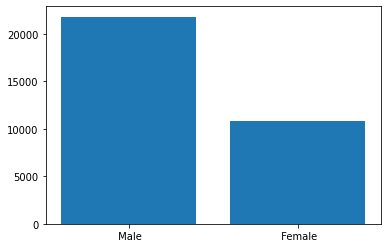

In [59]:
mpl.bar(r1.index,r1.values)
mpl.show()

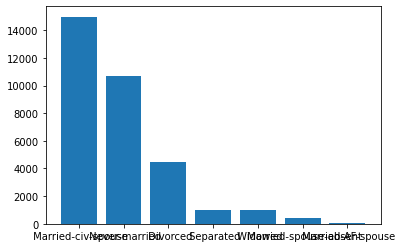

In [60]:
mpl.bar(r2.index,r2.values)
mpl.show()

In [61]:
r3=df['income'].value_counts()
r3

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

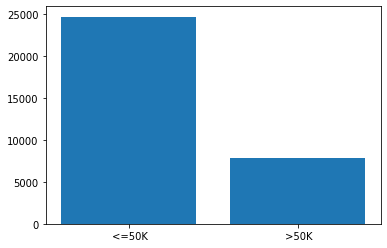

In [62]:
mpl.bar(r3.index,r3.values)
mpl.show()

# **catogorical conversion**

In [63]:
status = pd.get_dummies(df['sex'], drop_first = True)
#status1 = pd.get_dummies(df['income'], drop_first = True)
# Adding the status to the original housing dataframe
adult1 = pd.concat([df, status], axis = 1)
#adult2 = pd.concat([df, status1], axis = 1)
# Dropping 'furnishingstatus' as we have created the dummies for it
df.drop(['sex'], axis = 1, inplace = True)
#df.drop(['income'], axis = 1, inplace = True)

adult1

,Age,work class,fln,education num,ed_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,house/week,native_country,income,Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,1


# **droping the invalid columns**

In [64]:
df.drop(['maritalstatus','work class','education num','ed_num','relationship','occupation','race','native_country'], axis = 1, inplace = True)

In [65]:
df

,Age,fln,capital_gain,capital_loss,house/week,income
0,39,77516,2174,0,40,<=50K
1,50,83311,0,0,13,<=50K
2,38,215646,0,0,40,<=50K
3,53,234721,0,0,40,<=50K
4,28,338409,0,0,40,<=50K
...,...,...,...,...,...,...
32556,27,257302,0,0,38,<=50K
32557,40,154374,0,0,40,>50K
32558,58,151910,0,0,40,<=50K
32559,22,201490,0,0,20,<=50K


# **dataframe and series**

In [66]:
x=df.drop('income',axis=1)
y=df['income']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(32561, 5)
(32561,)


# **splitting the data**

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 5)
(6513, 5)
(26048,)
(6513,)


# **confussion matrices error**

In [69]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [70]:
def eval_model(y_test,ypred):
  cm=confusion_matrix(y_test,ypred)
  print(cm)
  print('accuracy score',accuracy_score(y_test,ypred))
  print(classification_report(y_test,ypred))
def mscore(model):
  print('training score',model.score(x_train,y_train))
  print('testing score',model.score(x_test,y_test))
  

# **Model the problems**

# **Decision tree classification**




In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
m1=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=9)
m1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9)

In [73]:
mscore(m1)

training score 0.8237100737100738
testing score 0.8163672654690619


In [74]:
ypred_m1=m1.predict(x_test)
eval_model(y_test,ypred_m1)

[[4870   32]
 [1164  447]]
accuracy score 0.8163672654690619
              precision    recall  f1-score   support

       <=50K       0.81      0.99      0.89      4902
        >50K       0.93      0.28      0.43      1611

    accuracy                           0.82      6513
   macro avg       0.87      0.64      0.66      6513
weighted avg       0.84      0.82      0.78      6513



# **Random forest Classification Model**

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
m2=RandomForestClassifier(n_estimators=60,criterion='gini',max_depth=7,min_samples_split=10)
m2.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=60)

In [77]:
mscore(m2)

training score 0.8261286855036855
testing score 0.8180561953017043


In [78]:
ypred_m2=m2.predict(x_test)
eval_model(y_test,ypred_m2)

[[4882   20]
 [1165  446]]
accuracy score 0.8180561953017043
              precision    recall  f1-score   support

       <=50K       0.81      1.00      0.89      4902
        >50K       0.96      0.28      0.43      1611

    accuracy                           0.82      6513
   macro avg       0.88      0.64      0.66      6513
weighted avg       0.84      0.82      0.78      6513



# **Logistic Regression**

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
m3=LogisticRegression(max_iter=10000)
m3.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [81]:
mscore(m3)

training score 0.7992168304668305
testing score 0.79149393520651


In [82]:
ypred_m3=m3.predict(x_test)
eval_model(y_test,ypred_m3)

[[4725  177]
 [1181  430]]
accuracy score 0.79149393520651
              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87      4902
        >50K       0.71      0.27      0.39      1611

    accuracy                           0.79      6513
   macro avg       0.75      0.62      0.63      6513
weighted avg       0.78      0.79      0.75      6513



# **KNN classification**

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
m4=KNeighborsClassifier(n_neighbors=11)
m4.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [107]:
mscore(m4)

training score 0.8110795454545454
testing score 0.7875019192384461


In [108]:
ypred_knn=m4.predict(x_test)
eval_model(y_test,ypred_knn)

[[4730  172]
 [1212  399]]
accuracy score 0.7875019192384461
              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87      4902
        >50K       0.70      0.25      0.37      1611

    accuracy                           0.79      6513
   macro avg       0.75      0.61      0.62      6513
weighted avg       0.77      0.79      0.75      6513



# **SVC classification Model**

In [109]:
from sklearn.svm import SVC

In [110]:
m5=SVC(kernel='poly',C=0.01)
m5.fit(x_train,y_train)

SVC(C=0.01, kernel='poly')

In [111]:
mscore(m5)

training score 0.7635519041769042
testing score 0.756333486872409


In [112]:
ypred_m5=m5.predict(x_test)
eval_model(y_test,ypred_m5)

[[4902    0]
 [1587   24]]
accuracy score 0.756333486872409
              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4902
        >50K       1.00      0.01      0.03      1611

    accuracy                           0.76      6513
   macro avg       0.88      0.51      0.45      6513
weighted avg       0.82      0.76      0.66      6513



# **Generating confussion matrix and classification report**

In [113]:
def gen_model(model,x_test,x_train,y_test,y_train):
  model.fit(x_train,y_train)
  print('training score',model.score(x_train,y_train))
  print('testing score',model.score(x_test,y_test))
  ypred=model.predict(x_test,y_test)
  cm=confusion_matrix(y_test,ypred)
  print(cm)
  print(classification_report(y_test,ypred))

In [114]:
print(ypred_m1.shape)

(6513,)


In [115]:
print(ypred_knn.shape)
print(ypred_m3.shape)
print(ypred_m2.shape)
print(ypred_m5.shape)

(6513,)
(6513,)
(6513,)
(6513,)


In [116]:
x_test.columns

Index(['Age', 'fln', 'capital_gain', 'capital_loss', 'house/week'], dtype='object')

# **predicting the income**

In [117]:
submission_test=pd.DataFrame({'Test_Age':x_test['Age'],'pred_income':ypred_m1})
submission_test.head(100)

,Test_Age,pred_income
22135,33,<=50K
21242,19,<=50K
29518,70,<=50K
8915,41,<=50K
12198,18,<=50K
...,...,...
22733,49,<=50K
13407,33,<=50K
3655,42,>50K
11347,20,<=50K


# **Thank you**